In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pwd

'C:\\Users\\PC\\AppData\\Local\\Programs\\Microsoft VS Code'

In [2]:
dataTit = pd.read_excel('C:\\Users\\PC\\Desktop\\DatasetTitanic.xls')


In [3]:
dataTit.shape 
dataTit.columns
dataTit.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
data = dataTit.drop(['name','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'],axis=1)
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [5]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


 Rque: count(age)= 1046 != count(survived )= counr(pclass)=1309 !!! ce qui est impossible !!

In [6]:
data=data.dropna(axis=0)
data.shape

(1046, 4)

In [7]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


<AxesSubplot:>

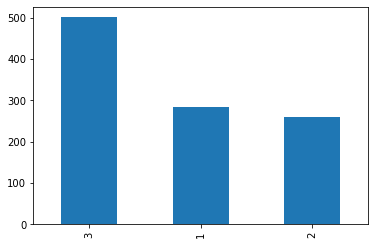

In [8]:
data['pclass'].value_counts().plot.bar()


In [9]:
data.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

$SKLEARN-KNN$

In [10]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [11]:
data['sex'].replace(['female','male'],[1,0],inplace=True)
data.head()

,pclass,survived,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,1,0,1,2.0000
3,1,0,0,30.0000
4,1,0,1,25.0000


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model=KNeighborsClassifier()

In [14]:
y=data['survived']
X=data.drop('survived',axis=1)

In [17]:
model.fit(X,y)
model.score(X,y)

0.8279158699808795

In [21]:
def survie(model,pclass=2,sex=0,age=22):
    x=np.array([pclass,sex,age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))


In [22]:
survie(model)

[0]
[[0.8 0.2]]


$Alors$ $j'ai$ $0.8$ $de$ $chance$ $pour$ $appartenir$ $à$ $la$ $classe$ $0$ $et$ $0.2$ $pour$ $vivre$ 

1


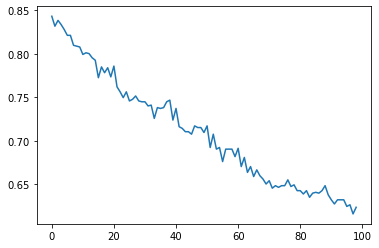

In [32]:
score=[]
best_k=1
best_score=0
for k in range(best_k,100):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X,y)
    score.append(model.score(X,y))

    if best_score < model.score(X,y):
        best_n=k
        best_score=model.score(X,y)

print(best_n)
plt.plot(score)
    

